--> Combining the flight data of specific airports.

--> Visualising missing data.

--> Removing the rows with missing data.

--> Storing the Processed flight dataframe to '**flight_data_full**.csv'.


***NECESSARY IMPORTS***

In [ ]:
import pandas as pd
import os
import missingno as msno


In [ ]:
#selected airports
airports = ('ATL','CLT','DEN','DFW','EWR','IAH','JFK','LAS','LAX','MCO','MIA','ORD','PHX','SEA','SFO')

#required fields
fields = ("FlightDate","Quarter" ,"Year","Month","DayofMonth","CRSDepTime","DepTime","DepDelayMinutes","DepDel15","OriginAirportID",
          "DestAirportID","CRSArrTime","ArrTime","ArrDelayMinutes","ArrDel15","Origin","Dest")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Flight_delay_prediction/flight_data/2016_2.csv', usecols = fields)
#df for only airports mentioned
df = df[df["Origin"].isin(airports)]
df = df[df["Dest"].isin(airports)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70839 entries, 3 to 423884
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             70839 non-null  int64  
 1   Quarter          70839 non-null  int64  
 2   Month            70839 non-null  int64  
 3   DayofMonth       70839 non-null  int64  
 4   FlightDate       70839 non-null  object 
 5   OriginAirportID  70839 non-null  int64  
 6   Origin           70839 non-null  object 
 7   DestAirportID    70839 non-null  int64  
 8   Dest             70839 non-null  object 
 9   CRSDepTime       70839 non-null  int64  
 10  DepTime          70245 non-null  float64
 11  DepDelayMinutes  70245 non-null  float64
 12  DepDel15         70245 non-null  float64
 13  CRSArrTime       70839 non-null  int64  
 14  ArrTime          70207 non-null  float64
 15  ArrDelayMinutes  70129 non-null  float64
 16  ArrDel15         70129 non-null  float64
dtypes: float64(

In [ ]:
df.isnull().sum()

Year                 0
Quarter              0
Month                0
DayofMonth           0
FlightDate           0
OriginAirportID      0
Origin               0
DestAirportID        0
Dest                 0
CRSDepTime           0
DepTime            594
DepDelayMinutes    594
DepDel15           594
CRSArrTime           0
ArrTime            632
ArrDelayMinutes    710
ArrDel15           710
dtype: int64

***HANDLING NULL VALUES***

Axes(0.125,0.11;0.698618x0.77)


Year               0
Quarter            0
Month              0
DayofMonth         0
FlightDate         0
OriginAirportID    0
Origin             0
DestAirportID      0
Dest               0
CRSDepTime         0
DepTime            0
DepDelayMinutes    0
DepDel15           0
CRSArrTime         0
ArrTime            0
ArrDelayMinutes    0
ArrDel15           0
dtype: int64

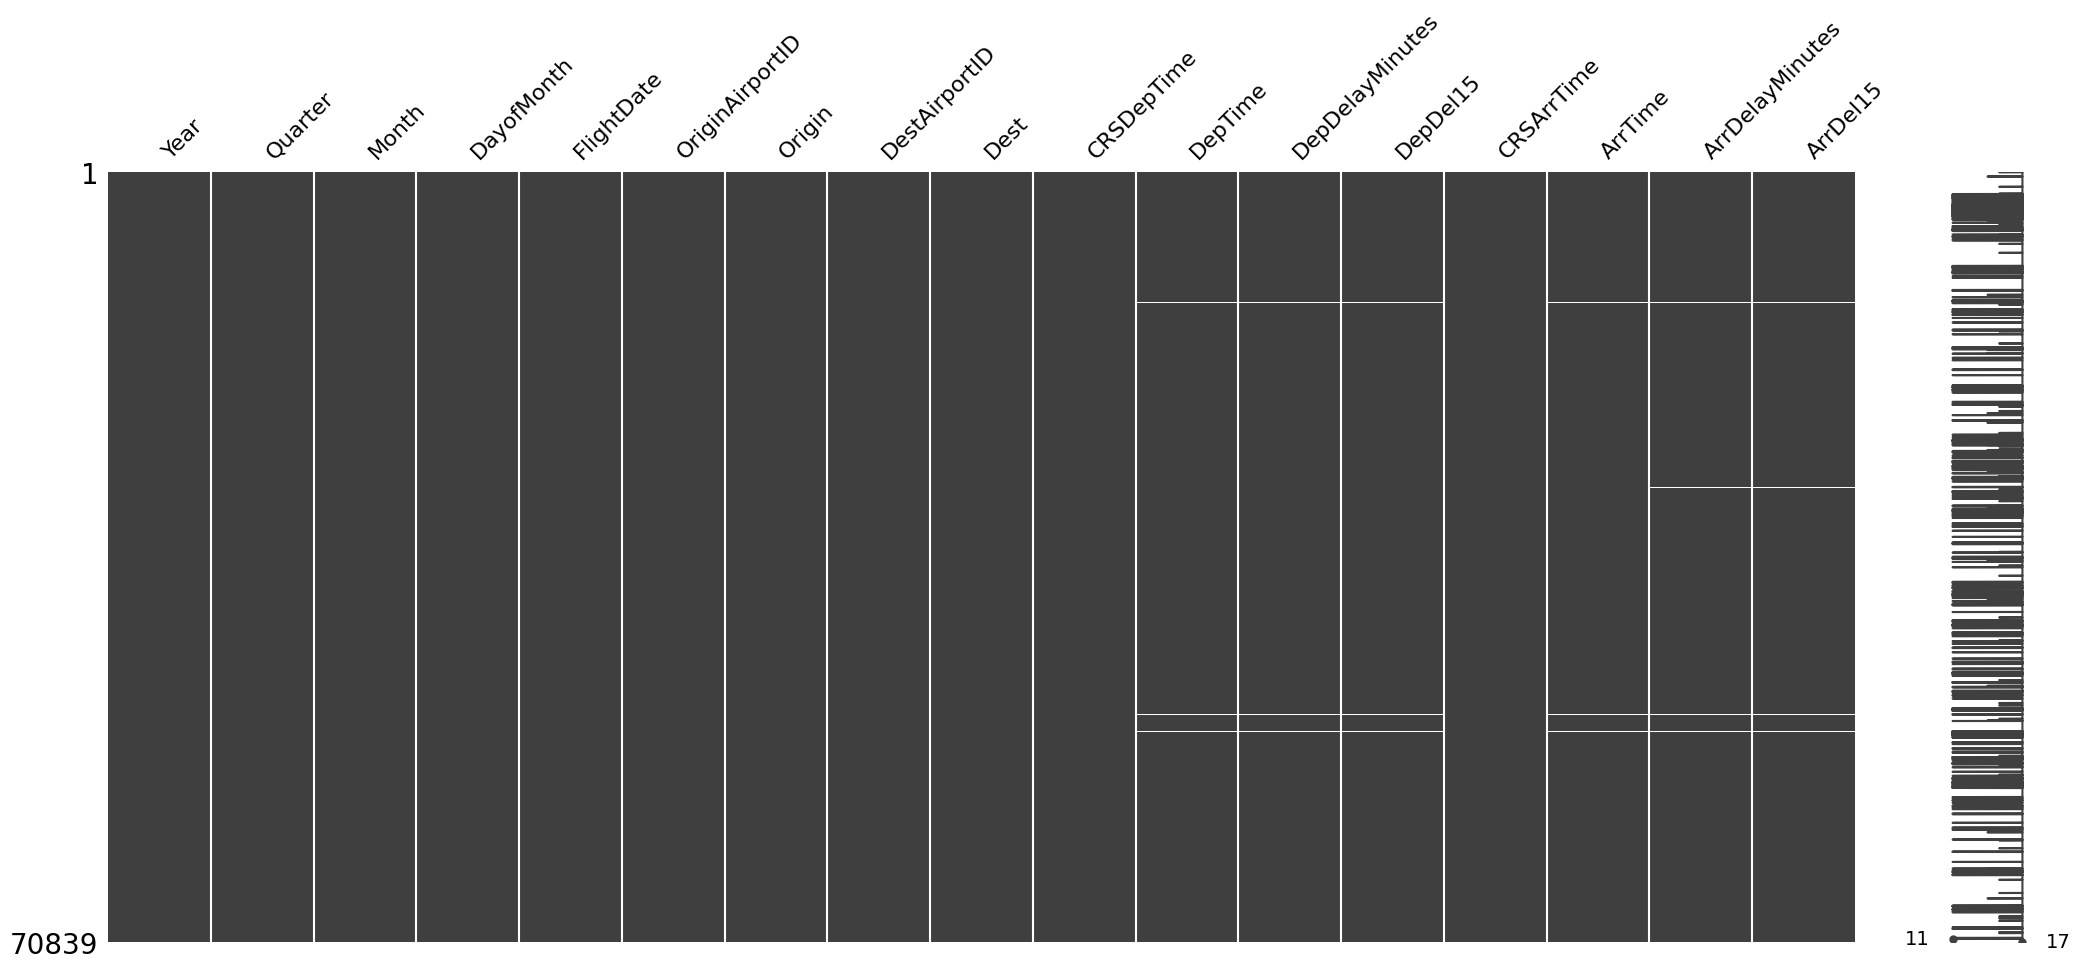

In [ ]:
print(msno.matrix(df))
#dropping rows with null values
df = df.dropna(how="any", axis=0)
df.isnull().sum()


In [ ]:
flight_data_path = '/content/drive/MyDrive/Flight_delay_prediction/flight_data'
flight_data_files = [os.path.join(flight_data_path, f) for f in os.listdir(flight_data_path)]
flight_data = list()
#creating df for each file in the flight_data folder and appending onto a list
for file in flight_data_files:
    if file.endswith('.csv'):
      df = pd.read_csv(file, usecols=fields)
      df = df[df["Origin"].isin(airports)]
      df = df[df["Dest"].isin(airports)]
      #df = df.drop(columns = ["Origin","Dest"])
      df = df.dropna(how="any", axis=0)
      flight_data.append(df)
      print(file)

/content/drive/MyDrive/Flight_delay_prediction/flight_data/2016_1.csv
/content/drive/MyDrive/Flight_delay_prediction/flight_data/2016_2.csv
/content/drive/MyDrive/Flight_delay_prediction/flight_data/2016_3.csv
/content/drive/MyDrive/Flight_delay_prediction/flight_data/2016_4.csv
/content/drive/MyDrive/Flight_delay_prediction/flight_data/2016_5.csv
/content/drive/MyDrive/Flight_delay_prediction/flight_data/2016_7.csv
/content/drive/MyDrive/Flight_delay_prediction/flight_data/2016_9.csv
/content/drive/MyDrive/Flight_delay_prediction/flight_data/2016_6.csv
/content/drive/MyDrive/Flight_delay_prediction/flight_data/2016_8.csv
/content/drive/MyDrive/Flight_delay_prediction/flight_data/2016_10.csv
/content/drive/MyDrive/Flight_delay_prediction/flight_data/2016_11.csv
/content/drive/MyDrive/Flight_delay_prediction/flight_data/2016_12.csv
/content/drive/MyDrive/Flight_delay_prediction/flight_data/2017_1.csv
/content/drive/MyDrive/Flight_delay_prediction/flight_data/2017_2.csv
/content/drive/My

***COMBINING ALL FLIGHT DATA***

In [ ]:
#adding the separate dataframes and creating a single df
flight_data_df = pd.concat(flight_data)
flight_data_df = flight_data_df.reset_index(drop=True)
print(flight_data_df.info())
#storing final data frame to flight_data_full.csv
flight_data_df.to_csv("/content/drive/MyDrive/Flight_delay_prediction/flight_data_full.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1851436 entries, 0 to 1851435
Data columns (total 17 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Year             int64  
 1   Quarter          int64  
 2   Month            int64  
 3   DayofMonth       int64  
 4   FlightDate       object 
 5   OriginAirportID  int64  
 6   Origin           object 
 7   DestAirportID    int64  
 8   Dest             object 
 9   CRSDepTime       int64  
 10  DepTime          float64
 11  DepDelayMinutes  float64
 12  DepDel15         float64
 13  CRSArrTime       int64  
 14  ArrTime          float64
 15  ArrDelayMinutes  float64
 16  ArrDel15         float64
dtypes: float64(6), int64(8), object(3)
memory usage: 240.1+ MB
None


In [ ]:
flight_data_df.describe()

,Year,Quarter,Month,DayofMonth,OriginAirportID,DestAirportID,CRSDepTime,DepTime,DepDelayMinutes,DepDel15,CRSArrTime,ArrTime,ArrDelayMinutes,ArrDel15
count,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06
mean,2.016494e+03,2.515180e+00,6.544073e+00,1.576746e+01,1.273775e+04,1.273823e+04,1.327428e+03,1.328582e+03,1.403783e+01,2.009678e-01,1.496641e+03,1.471273e+03,1.426119e+01,2.095984e-01
std,4.999633e-01,1.104736e+00,3.396908e+00,8.790680e+00,1.354932e+03,1.354563e+03,5.115290e+02,5.270672e+02,4.152727e+01,4.007241e-01,5.431142e+02,5.662170e+02,4.143587e+01,4.070221e-01
min,2.016000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.039700e+04,1.039700e+04,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.016000e+03,2.000000e+00,4.000000e+00,8.000000e+00,1.129800e+04,1.129800e+04,9.050000e+02,9.060000e+02,0.000000e+00,0.000000e+00,1.110000e+03,1.052000e+03,0.000000e+00,0.000000e+00
50%,2.016000e+03,3.000000e+00,7.000000e+00,1.600000e+01,1.289200e+04,1.289200e+04,1.316000e+03,1.322000e+03,0.000000e+00,0.000000e+00,1.534000e+03,1.522000e+03,0.000000e+00,0.000000e+00
75%,2.017000e+03,3.000000e+00,9.000000e+00,2.300000e+01,1.393000e+04,1.393000e+04,1.737000e+03,1.747000e+03,9.000000e+00,0.000000e+00,1.938000e+03,1.934000e+03,1.000000e+01,0.000000e+00
max,2.017000e+03,4.000000e+00,1.200000e+01,3.100000e+01,1.477100e+04,1.477100e+04,2.359000e+03,2.400000e+03,2.149000e+03,1.000000e+00,2.400000e+03,2.400000e+03,2.142000e+03,1.000000e+00


In [ ]:
flight_data_df.isnull().sum()


Year               0
Quarter            0
Month              0
DayofMonth         0
FlightDate         0
OriginAirportID    0
Origin             0
DestAirportID      0
Dest               0
CRSDepTime         0
DepTime            0
DepDelayMinutes    0
DepDel15           0
CRSArrTime         0
ArrTime            0
ArrDelayMinutes    0
ArrDel15           0
dtype: int64

In [ ]:
flight_data_df.shape

(1851436, 17)